In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
from matplotlib import cm

import seaborn as sns

from pydataset import data

np.set_printoptions(suppress=True)

In [3]:
def create_cluster(df, X, k):
    
    """ Takes in df, X (dataframe with variables you want to cluster on) and k
    # It scales the X, calcuates the clusters and return dataframe (with clusters), the Scaled dataframe,
    #the scaler and kmeans object and unscaled centroids as a dataframe"""
    
    scaler = StandardScaler(copy=True).fit(X)
    X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns.values).set_index([X.index.values])
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    kmeans.predict(X_scaled)
    df['cluster'] = kmeans.predict(X_scaled)
    df['cluster'] = 'cluster_' + df.cluster.astype(str)
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    return df, X_scaled, scaler, kmeans, centroids

## 1.Clustering with the Iris Dataset
Using this lesson as a guide, perform clustering on the iris dataset.

Choose features other than the ones used in the lesson. Visualize the results of your clustering. Use the elbow method to visually select a good value for k. Repeat the clustering, this time with 3 different features.

In [4]:
from sklearn.cluster import KMeans

iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [6]:
X = iris[['petal_width', 'sepal_width']]

In [7]:

iris, X_scaled, scaler, kmeans, centroids = create_cluster(iris, X, 3)

In [9]:
def create_scatter_plot(x,y,df,kmeans, X_scaled, scaler):
    
    """ Takes in x and y (variable names as strings, along with returned objects from previous
    function create_cluster and creates a plot"""
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x = x, y = y, data = df, hue = 'cluster')
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    centroids.plot.scatter(y=y, x= x, ax=plt.gca(), alpha=.30, s=500, c='black')

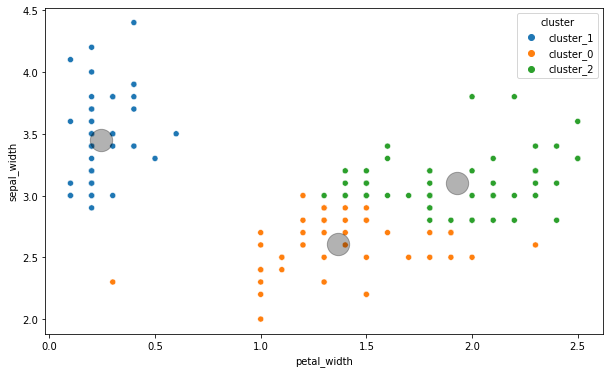

In [10]:
create_scatter_plot('petal_width', 'sepal_width',iris,kmeans, X_scaled, scaler)

Text(0.5, 1.0, 'Actual Species')

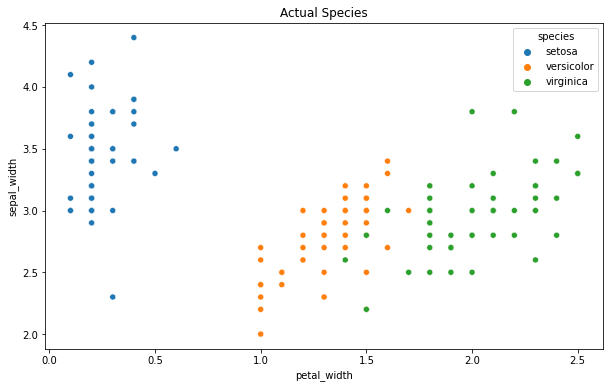

In [11]:
# plot actual species

plt.figure(figsize = (10,6))
sns.scatterplot(x = 'petal_width', y = 'sepal_width', data = iris, hue = 'species')
plt.title('Actual Species')

In [12]:
# let's use petal_length, sepal_length and petal_width for clustering

X = iris[['petal_length', 'sepal_length', 'petal_width']]

# Use the functions we had created earlier to create clusters and visualize 

iris, X_scaled, scaler, kmeans, centroids = create_cluster(iris, X, 3)


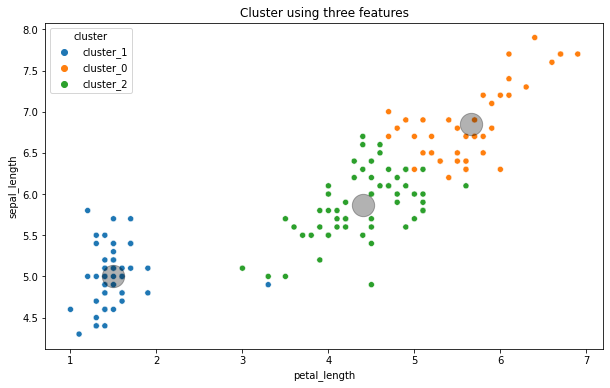

In [13]:

# create scatter plot 

create_scatter_plot('petal_length','sepal_length',iris,kmeans, X_scaled, scaler)
plt.title('Cluster using three features');

Text(0.5, 1.0, 'Actual Species')

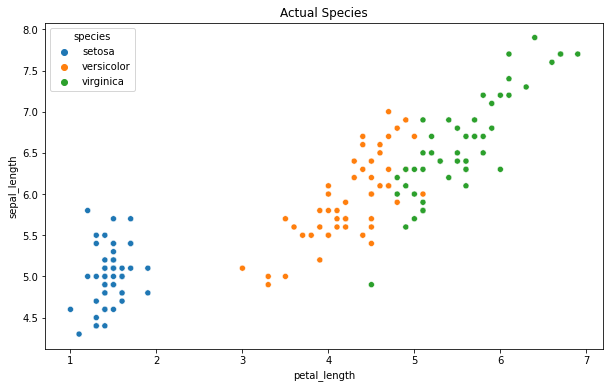

In [15]:

plt.figure(figsize = (10,6))
sns.scatterplot(x = 'petal_length', y = 'sepal_length', data = iris, hue = 'species')
plt.title('Actual Species')

### 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [23]:
def get_db_url(database):
    from env import host, user, password
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

In [18]:
def get_mall_customers(sql):
	    url = get_db_url('mall_customers')
	    mall_df = pd.read_sql(sql, url, index_col='customer_id')
	    return mall_df

In [25]:
# acquire data

mall_df = get_mall_customers(sql)

In [28]:
df = mall_df

In [34]:
df

,gender,age,annual_income,spending_score,cluster
customer_id,,,,,
1,Male,19,15,39,cluster_2
2,Male,21,15,81,cluster_3
3,Female,20,16,6,cluster_2
4,Female,23,16,77,cluster_3
5,Female,31,17,40,cluster_2
...,...,...,...,...,...
196,Female,35,120,79,cluster_4
197,Female,45,126,28,cluster_1
198,Male,32,126,74,cluster_4


In [29]:
X = df[['annual_income', 'spending_score']]

In [30]:
# Lets create a scaled dataframe

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
X_scaled.head()

,annual_income,spending_score
1,-1.738999,-0.434801
2,-1.738999,1.195704
3,-1.700830,-1.715913
4,-1.700830,1.040418
5,-1.662660,-0.395980


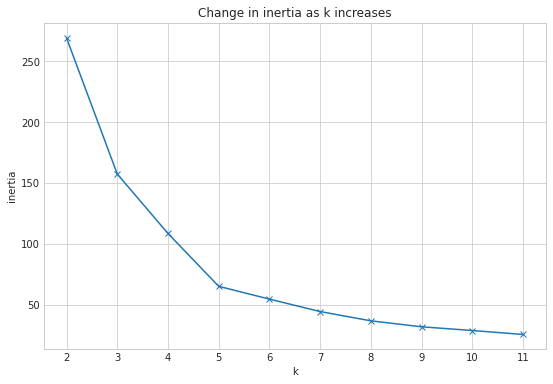

In [31]:
# let us explore what values of k might be appropriate

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [32]:

df, X_scaled, scaler, kmeans, centroids = create_cluster(df, X, 5)

<Figure size 1008x648 with 0 Axes>

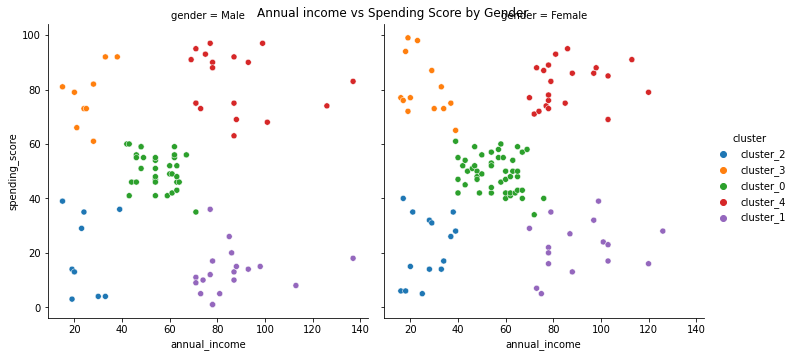

In [35]:

plt.figure(figsize=(14, 9))
sns.relplot(x = 'annual_income', y = 'spending_score', data = df, hue = 'cluster', col = 'gender')
plt.suptitle('Annual income vs Spending Score by Gender');

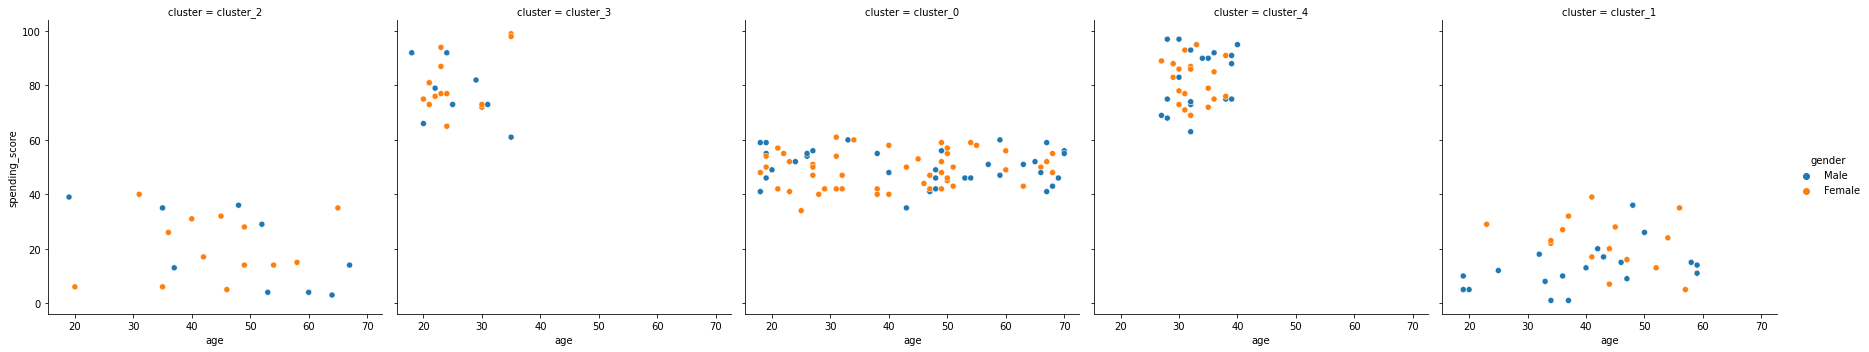

In [37]:
sns.relplot(x = 'age', y = 'spending_score', data = df, col = 'cluster', hue = 'gender')

Cluster 0: (Young, low income/ high spenders)
20-35s age range
lower income range
high spending score
Cluster 1: (average income/ average spenders)
All age ranges
average income range
average spending score
Cluster 2: (high income/low spenders)
All age ranges
upper half of income range
lower spending score
Cluster 3: (low income/low spenders)
All age ranges
lower half of income range
lower spending
Cluster 4: (Millennials with high income, high spending score)
Age: 30s and 40s('millennials')
Upper half of income range
Higher spending score